**LAB 4.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1vD0i34RVMFKXdvDmnZmejmTQ-tNm5xcB?usp=sharing

# **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Lab4/'

In [ ]:
!pip install seaborn

In [ ]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv(data_dir + 'urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [ ]:
#Check shape
data0.shape

(10000, 18)

In [ ]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

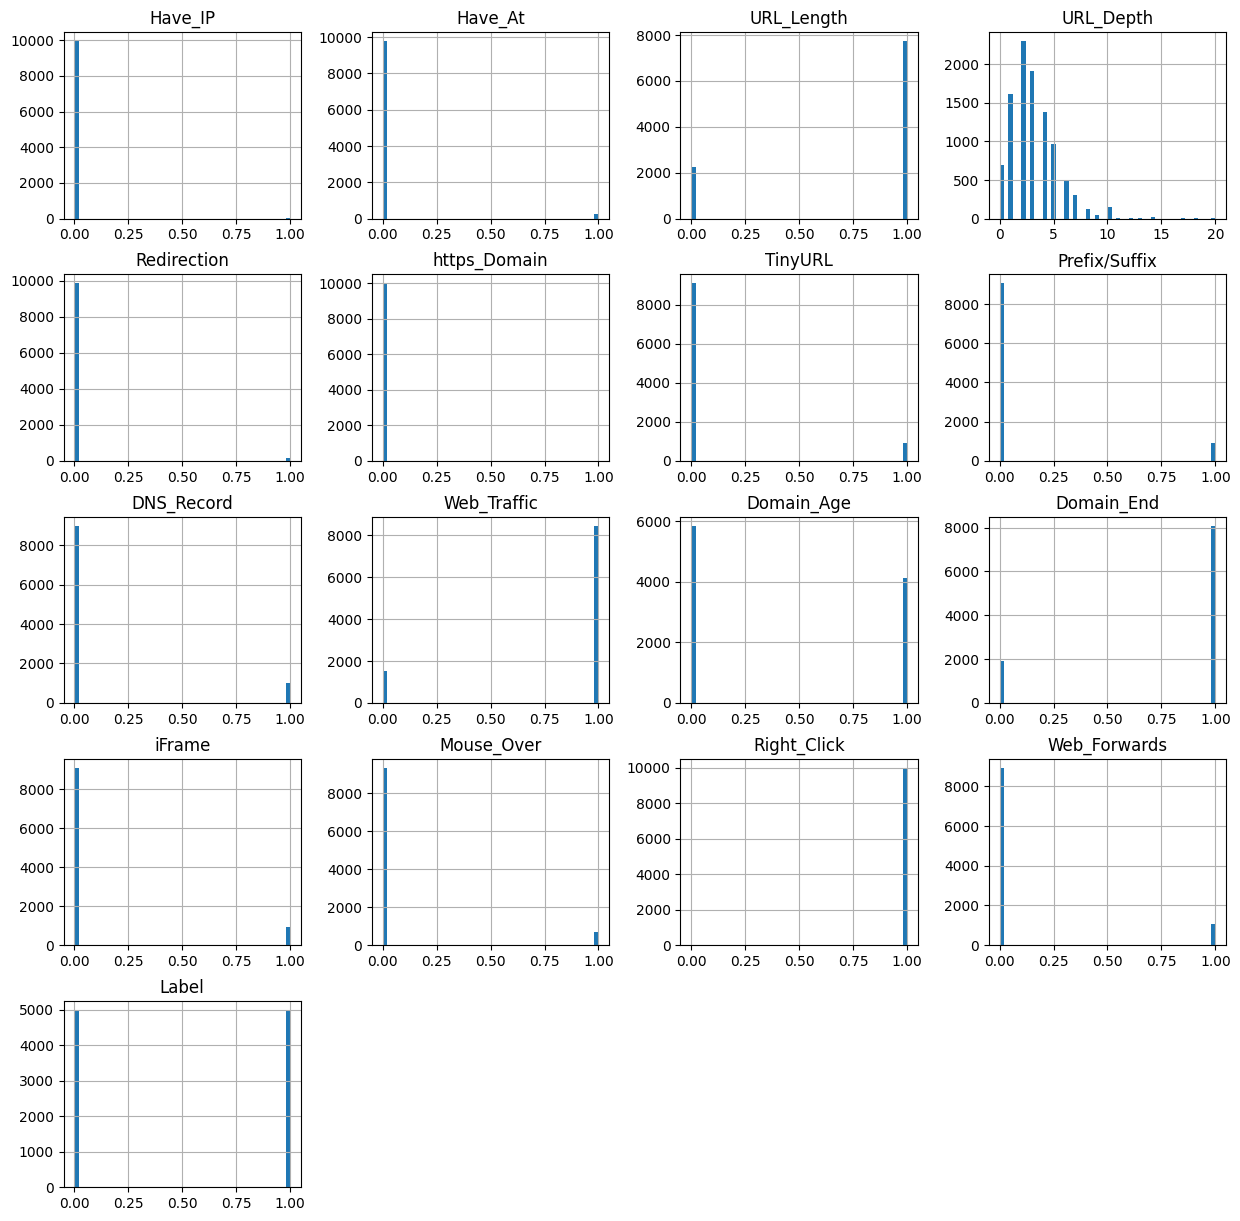

In [ ]:
#Plotting the data distribution
#
data0.hist(bins = 50,figsize = (15,15))
plt.show()

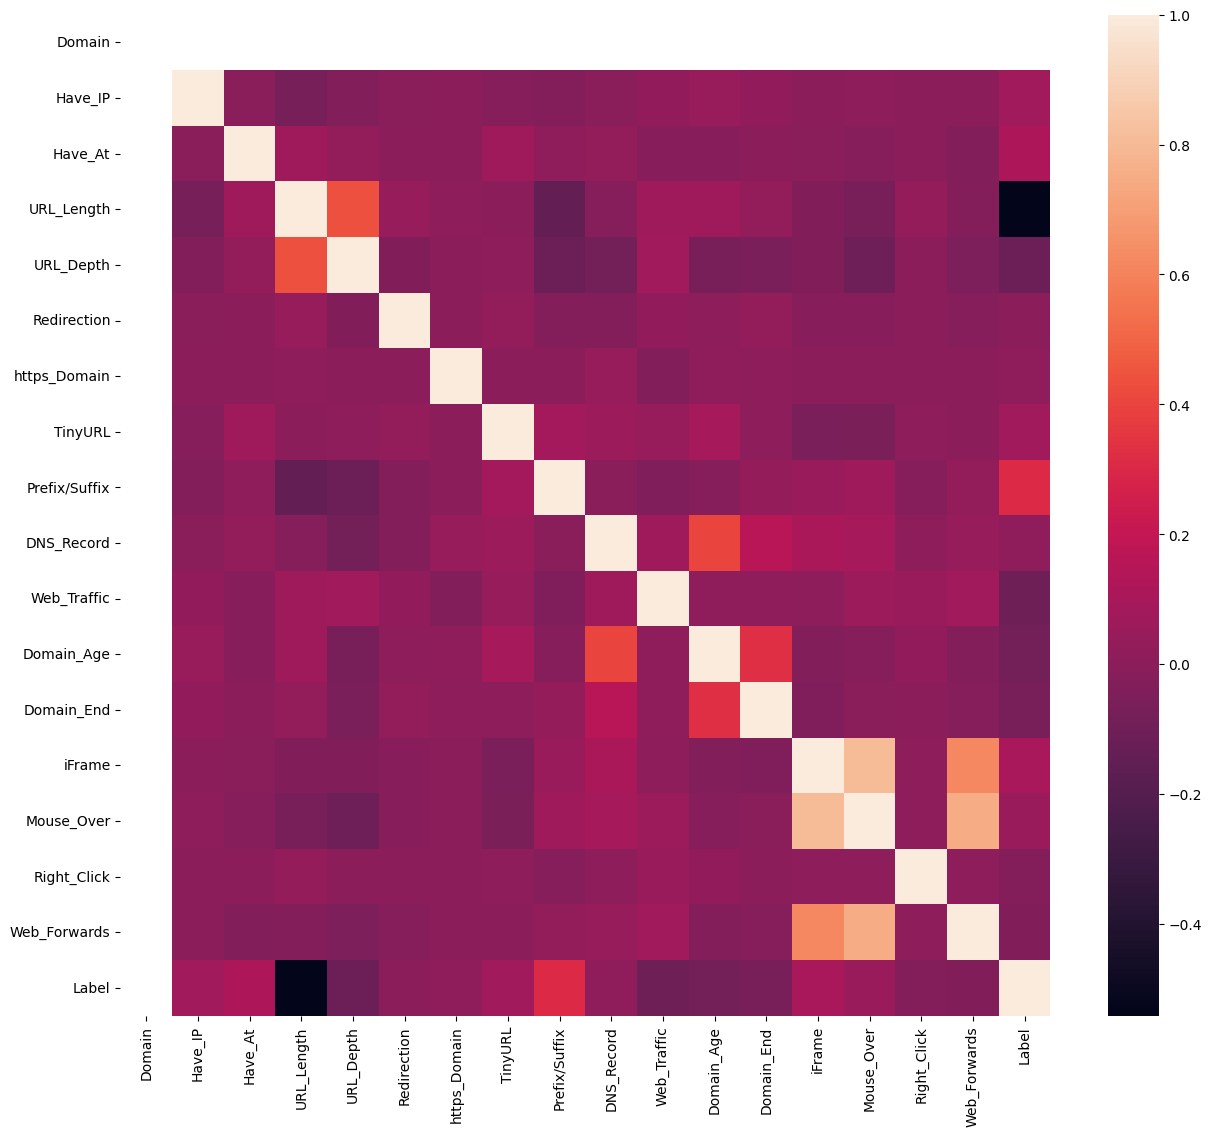

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
data0 = data0.apply(pd.to_numeric, errors="coerce")
sns.heatmap(data0.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [ ]:
data0.describe()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,0.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,NaN,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,NaN,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,NaN,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,NaN,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,NaN,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,NaN,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,2,0,0,0,0,0,0,1,1,1,1,1,1,1
1,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,1,0
3,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0


# **6. Chia dữ liệu**

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [ ]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.812
Decision Tree: Accuracy on test Data: 0.817


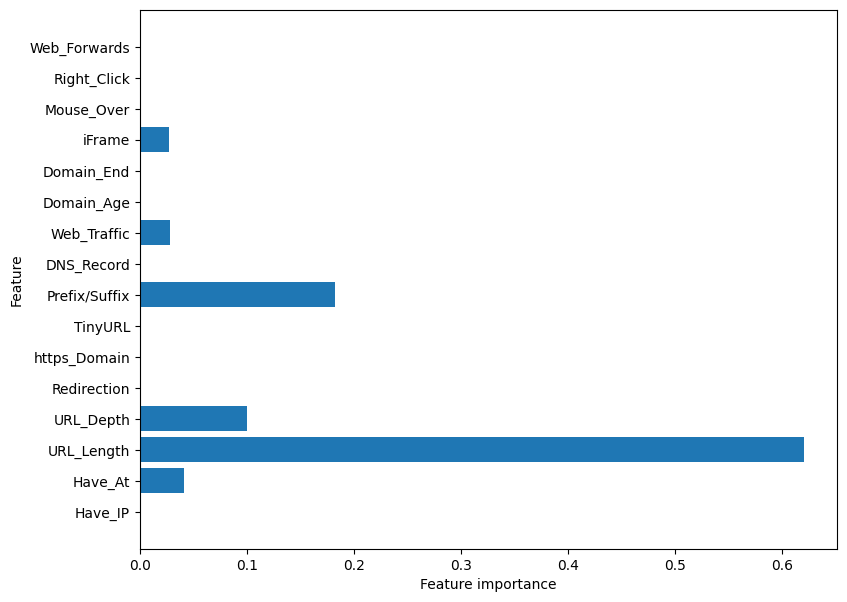

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.817
Random forest: Accuracy on test Data: 0.825


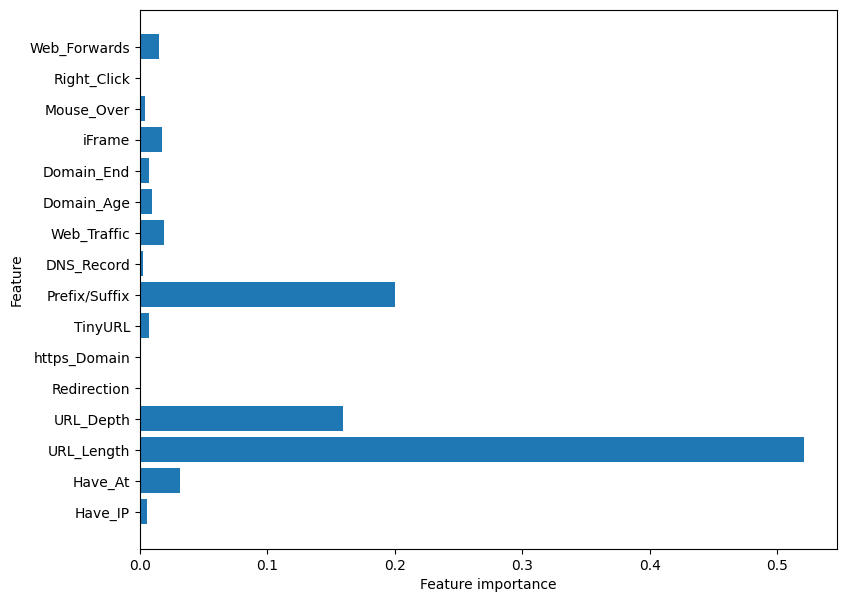

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.863
Multilayer Perceptrons: Accuracy on test Data: 0.869


**Lưu trữ kết quả**

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.865
XGBoost : Accuracy on test Data: 0.872


**Lưu trữ kết quả**

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Autoencoder Neural Network**
***Bài tập số 1: Hoàn thành huấn luyến mô hình ANN.***

Tham khảo từ nguồn: https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [ ]:
# This is the size of our encoded representations
encoding_dim = 16
# Theo nhiều nguồn tham khảo thì `encoding_dim` nên là 7, 16, 32


input_img = keras.Input(shape=(16,)) # Số chiều input ở đây là 16 cột (Đã loại bỏ Domain và Label)

# encoded layer
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# decoded layer
decoded = layers.Dense(16, activation='sigmoid')(encoded)

#  model sẽ ánh xạ một input vào một reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# Còn model này sẽ map input thành bản bị encoded của nó
encoder = keras.Model(input_img, encoded)

In [ ]:
# Đây là input (đã bị encoded) với số chiều 16
encoded_input = keras.Input(shape=(encoding_dim,))
# Lấy output layer từ model Autoencoder
decoder_layer = autoencoder.layers[-1]
# Tạo model Decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test)
                )

Epoch 1/50
32/32 [==============================] - 2s 36ms/step - loss: 0.7168 - accuracy: 0.0164 - val_loss: 0.6116 - val_accuracy: 0.1195
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 0.5198 - accuracy: 0.2245 - val_loss: 0.4088 - val_accuracy: 0.4060
Epoch 3/50
32/32 [==============================] - 0s 10ms/step - loss: 0.3002 - accuracy: 0.4613 - val_loss: 0.1681 - val_accuracy: 0.5745
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.6205 - val_loss: -0.1128 - val_accuracy: 0.6760
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: -0.2532 - accuracy: 0.7387 - val_loss: -0.4167 - val_accuracy: 0.7930
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: -0.5645 - accuracy: 0.8129 - val_loss: -0.7439 - val_accuracy: 0.8250
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: -0.9047 - accuracy: 0.8382 - val_loss: -1.0968 - val_accuracy: 0.8450
Epoch 8/50

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 3ms/step - loss: -78.6824 - accuracy: 0.8450

Autoencoder: Accuracy on training Data: 0.844
Autoencoder: Accuracy on test Data: 0.845


In [ ]:
storeResults('Autoencoder Neural Network', acc_train_auto, acc_test_auto)

## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.800
SVM : Accuracy on test Data: 0.810


In [ ]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

# **8. So sánh các mô hình**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.812,0.816
1,Random Forest,0.817,0.825
2,Multilayer Perceptrons,0.863,0.868
3,XGBoost,0.865,0.872
4,Autoencoder Neural Network,0.844,0.845
5,Support Vector Machines,0.800,0.810


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.865,0.872
2,Multilayer Perceptrons,0.863,0.868
4,Autoencoder Neural Network,0.844,0.845
1,Random Forest,0.817,0.825
0,Decision Tree,0.812,0.816
5,Support Vector Machines,0.800,0.810


In [ ]:
#Code lưu trữ mô hình
import joblib
joblib.dump(tree, "/content/drive/MyDrive/Lab4/Stored Model/DecisionTree.pkl")
joblib.dump(forest, "/content/drive/MyDrive/Lab4/Stored Model/RandomForest.pkl")
joblib.dump(mlp, "/content/drive/MyDrive/Lab4/Stored Model/MultilayerPerceptrons.pkl")
joblib.dump(xgb, "/content/drive/MyDrive/Lab4/Stored Model/XGBoost.pkl")
joblib.dump(autoencoder, "/content/drive/MyDrive/Lab4/Stored Model/AutoncoderNN.pkl")
joblib.dump(svm, "/content/drive/MyDrive/Lab4/Stored Model/SupportVectorMachine.pkl")

['/content/drive/MyDrive/Lab4/Stored Model/SupportVectorMachine.pkl']

In [ ]:
!ls "/content/drive/MyDrive/Lab4/Stored Model/"

AutoencoderNN.h5  MultilayerPerceptrons.pkl  SupportVectorMachine.pkl
DecisionTree.pkl  RandomForest.pkl	     XGBoost.pkl


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 4.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv -O /content/drive/MyDrive/Lab4/online-valid.csv

URL transformed to HTTPS due to an HSTS policy
--2024-04-28 10:16:19--  https://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.243.239, 104.17.244.239, 2606:4700::6811:f4ef, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.17.243.239|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1714299389&Signature=Z25nnOhmZnjh3RlCMaGnYQngYdqWQ7LfKvkmA8sn9gv4-zGcybYoigeeuFnPO2DL9INwG8EUMn~v7WYkueNop~ggponvBx7IhctDL5CpRj0USs2GH-fSQtER~g4R3g~6fD3joW-y05Dynh6pe4OnruaU1rr9lulaElRaVyYYjRLNuTmCPgTLhmsIcNEmjfj5~Ldeg3q-UOlV-E7zH~kyC8tHKlOWcu653dj8Ec7KrJLR2p3B0gJUw3PF57tht3kAGLnpKfQOqO58cYnq7mtbt92h6B5imt1chRbdEo0Z3EkS6YIj8EjehgyfOi~XGIZBEuQukTBJASTQIVl5wHL6FQ__&Key-Pair-Id=APKAILB45UG3RB4CSOJA [following]
--2024-04-28 10:16:19--  https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1714299389&Signature=Z25nnOhmZnjh3RlCMaGnYQngYdqWQ7LfKvk

In [41]:
#Load CSV
data0 = pd.read_csv("/content/drive/MyDrive/Lab4/online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8555043,http://ff-menmber-garena.vn/0rJSML6Kn06s1j5WQb...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-28T09:07:22+00:00,yes,2024-04-28T09:09:55+00:00,yes,Other
1,8555042,http://www.ff-menmber-garena.vn/ejojbenjv6rp7p...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-28T09:04:14+00:00,yes,2024-04-28T09:09:55+00:00,yes,Other
2,8555039,http://www.ff-menmber-garena.vn/hC9mCkHcjZFkL3...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-28T09:00:17+00:00,yes,2024-04-28T09:09:55+00:00,yes,Other
3,8555038,http://ff-menmber-garena.vn/8nNU1qB2YeQEFRG8N9...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-28T08:56:22+00:00,yes,2024-04-28T09:09:55+00:00,yes,Other
4,8555037,http://ff-menmber-garena.vn/IlrKxrTYrVdknohejH...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-28T08:48:43+00:00,yes,2024-04-28T09:09:55+00:00,yes,Other


In [ ]:
data0.shape

(60888, 8)

Chọn ngẫu nhiên 5000 mẫu.

In [42]:
#Ở đây ta chỉ trích xuất 100 mẫu để tiết kiệm thời gian
phishurl = data0.sample(n = 100, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8321470,https://att-100247.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-10-05T18:05:14+00:00,yes,2023-10-05T19:23:57+00:00,yes,Other
1,8438949,https://atbu.edu.ng/wp-admin/js/widgets/dhl/tr...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-02T13:05:01+00:00,yes,2024-02-05T03:22:53+00:00,yes,Other
2,8454164,https://flow.page/voicerecord7,http://www.phishtank.com/phish_detail.php?phis...,2024-02-16T09:13:45+00:00,yes,2024-02-16T09:22:29+00:00,yes,Other
3,8517425,http://votepixelfarts.pages.dev,http://www.phishtank.com/phish_detail.php?phis...,2024-04-02T16:29:52+00:00,yes,2024-04-02T17:12:18+00:00,yes,Other
4,8175991,https://bafybeicdzm5mesjhwc73vsg5gymabxmzjjl3k...,http://www.phishtank.com/phish_detail.php?phis...,2023-06-12T23:13:23+00:00,yes,2023-06-12T23:23:39+00:00,yes,Other


In [43]:
phishurl.shape

(100, 8)

## **1.2. Legitimate URLs:**

In [44]:
#Load legitimate files
data1 = pd.read_csv(data_dir + "Benign_list.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [45]:
#Collect 100 Legitimate URLs randomly
legiurl = data1.sample(n = 100, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [46]:
legiurl.shape

(100, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [47]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [48]:
# 1.Domain
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  print("The domain is: ", domain)
  return domain

In [49]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [50]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [51]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [52]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  #print(s)
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [53]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [54]:
# 7. https_Domain  (Đã FIX)
def httpDomain(url):
  domain = urlparse(url).scheme
  #print(domain)
  if 'https' in domain or 'http' in domain:
    return 1
  else:
    return 0

In [55]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [56]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [ ]:
!pip install python-whois

In [57]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [58]:
##Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
#Bởi vì trang data.alexa.com đã dead, nên ta sử dụng similarweb để thay thế
# 12.Web traffic
def web_traffic(url):
    try:
        # Fill whitespaces in URL if any
        url = urllib.parse.quote(url)
        api_key = "d812d2399c5e461a86eaf0527e87590b"  # Thay thế YOUR_SIMILARWEB_API_KEY bằng API key của bạn từ SimilarWeb

        endpoint = f"https://api.similarweb.com/v1/website/{url}/total-traffic-and-engagement/visits"
        headers = {"User-Agent": "Mozilla/5.0", "Accept": "application/json"}
        params = {"api_key": api_key}

        response = requests.get(endpoint, headers=headers, params=params)
        data = response.json()

        rank = data.get("visits", {}).get("rank", None)
        if rank is not None and rank < 100000:
            return 1
        else:
            return 0
    except:
        return 1

In [59]:

res = web_traffic("https://facebook.com")
res

1

In [60]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [61]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [62]:
import requests

In [63]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [64]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [65]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [66]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [67]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

In [68]:
features = featureExtraction("http%3A//babal.net/women/view/80/%25D8%25AF%25D9%2584%25D9%2591%25D9%2584%25D9%258A-%25D9%2586%25D9%2581%25D8%25B3%25D9%2583-%25D8%25A3%25D9%258A%25D8%25AA%25D9%2587%25D8%25A7-%25D8%25A7%25D9%2584%25D8%25A3%25D9%2585-%25D9%2585%25D8%25B9-%25D9%2587%25D8%25B0%25D9%2587-%25D8%25A7%25D9%2584%25D9%2586%25D8%25B5%25D8%25A7%25D8%25A6%25D8%25A", 0)
features

The domain is:  


['', 0, 0, 1, 6, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

## **3.1 URL hợp pháp**

In [69]:
legiurl.shape

(100, 1)

In [70]:
legi_features = []
label = 0

for i in range(0, 100):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

The domain is:  graphicriver.net
The domain is:  ecnavi.jp
The domain is:  hubpages.com
The domain is:  extratorrent.cc
The domain is:  icicibank.com
The domain is:  nypost.com


2024-04-28 14:34:49,387 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kienthuc.net.vn
The domain is:  thenextweb.com
The domain is:  tobogo.net
The domain is:  akhbarelyom.com
The domain is:  tunein.com
The domain is:  tune.pk
The domain is:  sfglobe.com
The domain is:  mic.com
The domain is:  thenextweb.com
The domain is:  couchtuner.eu.com
The domain is:  olx.in
The domain is:  venturebeat.com
The domain is:  allegro.pl
The domain is:  allegro.pl
The domain is:  tinnhanh360.net
The domain is:  metro.co.uk
The domain is:  atwiki.jp
The domain is:  emgn.com
The domain is:  nguyentandung.org


2024-04-28 14:47:07,665 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  motthegioi.vn
The domain is:  spankbang.com
The domain is:  torcache.net
The domain is:  mic.com
The domain is:  thenextweb.com
The domain is:  emgn.com
The domain is:  depositphotos.com
The domain is:  serverfault.com
The domain is:  kakaku.com
The domain is:  indianexpress.com
The domain is:  nypost.com
The domain is:  distractify.com
The domain is:  sourceforge.net
The domain is:  babal.net
The domain is:  serverfault.com
The domain is:  cookpad.com
The domain is:  plarium.com
The domain is:  pikabu.ru
The domain is:  grantland.com
The domain is:  allegro.pl
The domain is:  nguyentandung.org
The domain is:  allegro.pl
The domain is:  europa.eu
The domain is:  extratorrent.cc
The domain is:  persianblog.ir


2024-04-28 14:48:06,326 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


The domain is:  distractify.com


2024-04-28 14:48:11,823 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kenh14.vn
The domain is:  twitter.com
The domain is:  nesn.com
The domain is:  fishki.net
The domain is:  syosetu.com
The domain is:  akhbarelyom.com
The domain is:  allegro.pl
The domain is:  getpocket.com
The domain is:  mylust.com
The domain is:  censor.net.ua
The domain is:  pornsharing.com
The domain is:  genius.com
The domain is:  sourceforge.net
The domain is:  codecanyon.net
The domain is:  qz.com


2024-04-28 14:48:48,882 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kenh14.vn
The domain is:  uproxx.com
The domain is:  babal.net
The domain is:  mic.com
The domain is:  torcache.net
The domain is:  paytm.com


2024-04-28 14:48:56,682 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  motthegioi.vn
The domain is:  torcache.net
The domain is:  thenextweb.com
The domain is:  extratorrent.cc
The domain is:  genius.com
The domain is:  thenextweb.com


2024-04-28 14:49:21,140 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kienthuc.net.vn
The domain is:  sourceforge.net
The domain is:  nypost.com
The domain is:  ap.org
The domain is:  indianexpress.com
The domain is:  extratorrent.cc
The domain is:  correios.com.br
The domain is:  web.de
The domain is:  noticias.uol.com.br
The domain is:  bdnews24.com


2024-04-28 14:49:39,068 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kenh14.vn
The domain is:  codecanyon.net
The domain is:  tunein.com
The domain is:  nguyentandung.org


2024-04-28 14:49:45,781 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


The domain is:  kickass.to
The domain is:  weathernews.jp
The domain is:  atwiki.jp
The domain is:  plarium.com
The domain is:  chaturbate.com
The domain is:  babal.net
The domain is:  sberbank.ru
The domain is:  torcache.net


In [71]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,1,0,0,0,1,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,1,0,0,0,1,0,1,0,0,1,1,0


In [ ]:
legitimate.to_csv('/content/drive/MyDrive/Lab4/legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [72]:
phishurl.shape

(100, 8)

In [73]:
phish_features = []
label = 1
for i in range(0, 100):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

The domain is:  att-100247.weeblysite.com
The domain is:  atbu.edu.ng
The domain is:  flow.page
The domain is:  votepixelfarts.pages.dev
The domain is:  bafybeicdzm5mesjhwc73vsg5gymabxmzjjl3k263hyeks6twi5vnyw3qfm.ipfs.nftstorage.link
The domain is:  ipfs.io
The domain is:  dappbuilder.org
The domain is:  diefoedh.weeblysite.com
The domain is:  attsevrices.weebly.com
The domain is:  bdgdh.pages.dev
The domain is:  tgobo24.pages.dev
The domain is:  bafkreiaekjai362nwuorchkak6iyhvubr3fd3fjfi2qv5l3wx6ussy6me4.ipfs.cf-ipfs.com
The domain is:  ipfs.eth.aragon.network
The domain is:  axieinfinity.kesug.com
The domain is:  bafybeigtqnnltkdpl77bqlcgavun2jdt5ryxdzi4tx2iyzp3szwuwlxzeu.ipfs.cf-ipfs.com
The domain is:  kmo.pages.dev
The domain is:  lo-barnechea-6a202.web.app
The domain is:  5fggfgfgfg4g4gh4g4.blogspot.com
The domain is:  att-101765.weeblysite.com
The domain is:  pub-d6777c5345544c62915fd81902484a8c.r2.dev
The domain is:  noisy-block-aa73.oauth-convercaation.workers.dev
The domain i

In [74]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,att-100247.weeblysite.com,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1
1,atbu.edu.ng,0,0,1,7,0,1,0,0,0,1,0,1,0,0,1,0,1
2,flow.page,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1
3,votepixelfarts.pages.dev,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1
4,bafybeicdzm5mesjhwc73vsg5gymabxmzjjl3k263hyeks...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
phishing.to_csv('/content/drive/MyDrive/Lab4/phishing.csv', index= False)

# **4. Datasets**

In [75]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,1,0,0,0,1,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,1,0,0,0,1,0,1,0,0,1,1,0


In [76]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
195,docs.google.com,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0,1
196,metemesk-wallat.godaddysites.com,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1
197,bafybeih54zogdgx24b2clfnumukzqgc5qlw2gl5nsqmid...,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
198,cf-ipfs.com,0,0,1,2,0,1,0,1,0,1,0,1,0,0,1,0,1
199,new.express.adobe.com,0,0,0,2,0,1,0,0,0,1,1,1,0,0,1,0,1


In [77]:
urldata.shape

(200, 18)

In [78]:
urldata.to_csv('urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 200 rows trong đó có  100 phishing  & 100 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 4.2, chọn một tập dataset khác thực hiện lại Lab 4.1***

# **a. Lấy 1 dataset khác**
Dataset được lấy từ Medeley Data, nơi cung cấp research data một cách public: https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [79]:
!wget "https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded" -O /content/drive/MyDrive/Lab4/url_phis_legit.csv


--2024-04-28 15:10:29--  https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0 [following]
--2024-04-28 15:10:30--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.60.72, 52.218.120.170, 52.218.93.56, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.60.72|:4

In [81]:
%cd /content/drive/MyDrive/Lab4/

/content/drive/MyDrive/Lab4


In [82]:
import pandas as pd

dataset = pd.read_csv("url_phis_legit.csv")
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [83]:
dataset.shape

(11430, 89)

In [84]:
url = dataset.iloc[:,0]
url.head()

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
2    https://support-appleld.com.secureupdate.duila...
3                                   http://rgipt.ac.in
4    http://www.iracing.com/tracks/gateway-motorspo...
Name: url, dtype: object

In [85]:
import numpy as np

label_list = np.array(dataset.iloc[:,-1])
convertSeries = np.where(dataset.status.values == "phishing", 1, 0)
label = pd.Series(convertSeries)
label.name = "label" # Add 'label' column name
label.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [86]:
full_df = pd.concat([url, label], axis=1)
full_df

,url,label
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0
...,...,...
11425,http://www.fontspace.com/category/blackletter,0
11426,http://www.budgetbots.com/server.php/Server%20...,1
11427,https://www.facebook.com/Interactive-Televisio...,0
11428,http://www.mypublicdomainpictures.com/,0


In [87]:
df = full_df.sample(n=100, random_state=12)
df = df.reset_index(drop=True)
df.shape

(100, 2)

In [88]:
feature_list = []

for i in df.index:
  print("Link number No.%d" % i)
  url = df['url'][i]
  label = df['label'][i]
  feature_list.append(featureExtraction(url,label))

Link number No.0
The domain is:  sapient-flare-279107.df.r.appspot.com
Link number No.1
The domain is:  support-appleld.com.secureupdate.duilawyeryork.com
Link number No.2
The domain is:  centromusicalpaternense.es:443
Link number No.3
The domain is:  urbanmeisters.ovh
Link number No.4
The domain is:  immobiliereroseland.fr
Link number No.5
The domain is:  bellailusi.com.my
Link number No.6
The domain is:  en.academic.ru
Link number No.7
The domain is:  beedictionary.com
Link number No.8
The domain is:  hartzine.com
Link number No.9
The domain is:  pcgamer.com
Link number No.10
The domain is:  16quotes.com
Link number No.11
The domain is:  marketinghelper.com.au
Link number No.12
The domain is:  smartinsights.com
Link number No.13
The domain is:  storage.googleapis.com
Link number No.14
The domain is:  qr.altosushuaia.com
Link number No.15
The domain is:  bryanhansel.com
Link number No.16
The domain is:  gradshower.com
Link number No.17
The domain is:  lotstosave.com
Link number No.18


2024-04-28 15:17:41,061 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Link number No.82
The domain is:  staging.jayasaktigrup.com
Link number No.83
The domain is:  afriquelemou.free.fr
Link number No.84
The domain is:  media.io
Link number No.85
The domain is:  rapidpaws.com
Link number No.86
The domain is:  fantasycastlebooks.com
Link number No.87
The domain is:  iptvurls.com
Link number No.88
The domain is:  rishtapao.com
Link number No.89
The domain is:  null-byte.wonderhowto.com
Link number No.90
The domain is:  solar-center.stanford.edu
Link number No.91
The domain is:  germaniainternational.com
Link number No.92
The domain is:  proteinstructures.com
Link number No.93
The domain is:  issa365-my.sharepoint.com
Link number No.94
The domain is:  practical-shockley-f451be.netlify.app
Link number No.95
The domain is:  ceonc.com.br
Link number No.96
The domain is:  wh494528.ispot.cc
Link number No.97
The domain is:  bakerypublishing.com
Link number No.98
The domain is:  boconceptla.com
Link number No.99
The domain is:  happygoluckyhannah.com


In [89]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

df_phis_legit = pd.DataFrame(feature_list, columns= feature_names) # A dataframe with 'legitimate' and 'phising' URLs
df_phis_legit.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,sapient-flare-279107.df.r.appspot.com,0,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1
1,support-appleld.com.secureupdate.duilawyeryork...,0,0,1,2,0,1,0,1,0,1,1,1,1,1,1,1,1
2,centromusicalpaternense.es:443,0,0,1,2,0,1,0,0,0,1,1,1,0,0,1,0,1
3,urbanmeisters.ovh,0,0,1,6,0,1,0,0,0,1,1,1,1,1,1,1,1
4,immobiliereroseland.fr,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


# **b. Xem thông tin tổng quát của dữ liệu**

In [90]:
#Information
df_phis_legit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         100 non-null    object
 1   Have_IP        100 non-null    int64 
 2   Have_At        100 non-null    int64 
 3   URL_Length     100 non-null    int64 
 4   URL_Depth      100 non-null    int64 
 5   Redirection    100 non-null    int64 
 6   https_Domain   100 non-null    int64 
 7   TinyURL        100 non-null    int64 
 8   Prefix/Suffix  100 non-null    int64 
 9   DNS_Record     100 non-null    int64 
 10  Web_Traffic    100 non-null    int64 
 11  Domain_Age     100 non-null    int64 
 12  Domain_End     100 non-null    int64 
 13  iFrame         100 non-null    int64 
 14  Mouse_Over     100 non-null    int64 
 15  Right_Click    100 non-null    int64 
 16  Web_Forwards   100 non-null    int64 
 17  Label          100 non-null    int64 
dtypes: int64(17), object(1)
memory 

# **c. Trực quan hóa dữ liệu**

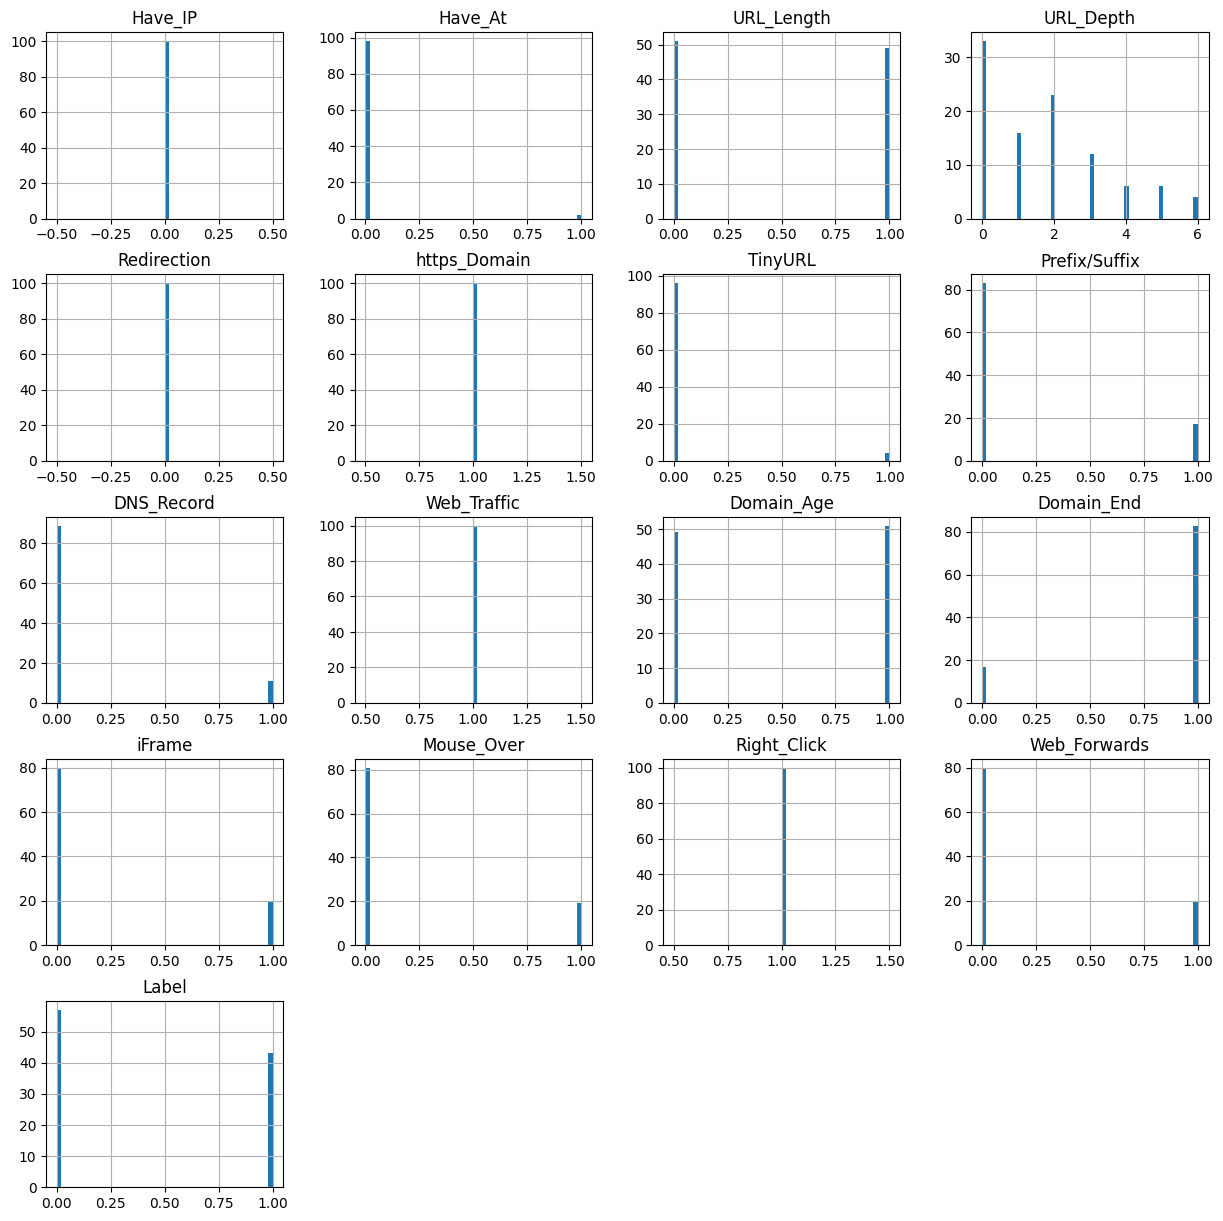

In [91]:
from matplotlib import pyplot as plt

#Plotting the data distribution
df_phis_legit.hist(bins = 50,figsize = (15,15))
plt.show()

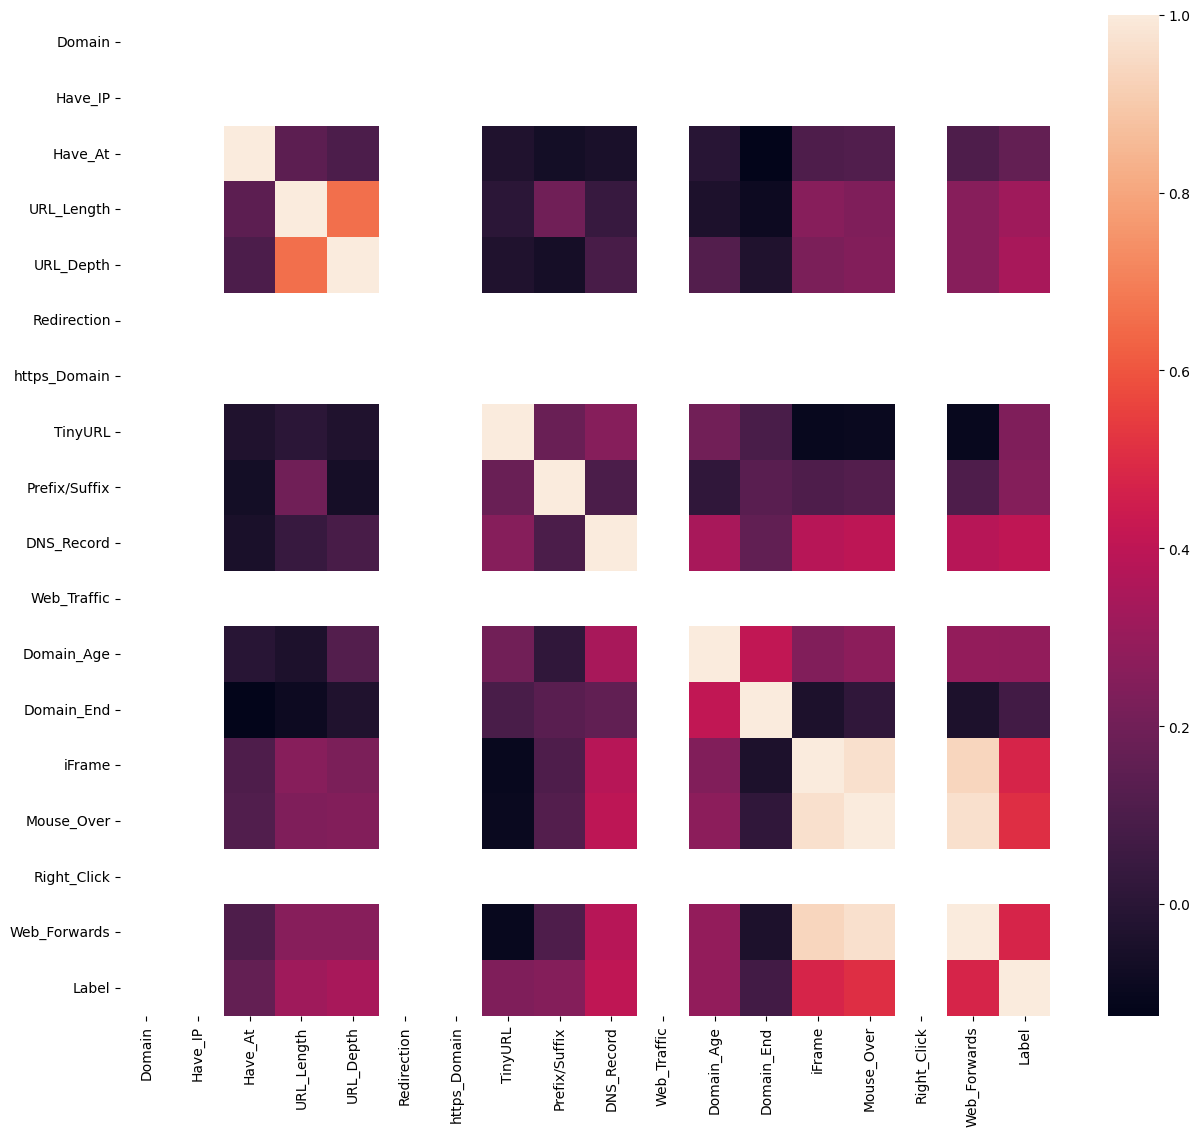

In [93]:
import seaborn as sns

#Correlation heatmap
plt.figure(figsize=(15,13))
df_phis_legit = df_phis_legit.apply(pd.to_numeric, errors="coerce")
sns.heatmap(df_phis_legit.corr())
plt.show()


# **d. Tiền xử lý dữ liệu & EDA**

In [94]:
df_phis_legit.describe()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,0.0,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.00000
mean,NaN,0.0,0.020000,0.490000,1.760000,0.0,1.0,0.040000,0.170000,0.110000,1.0,0.510000,0.830000,0.200000,0.190000,1.0,0.200000,0.43000
std,NaN,0.0,0.140705,0.502418,1.729833,0.0,0.0,0.196946,0.377525,0.314466,0.0,0.502418,0.377525,0.402015,0.394277,0.0,0.402015,0.49757
min,NaN,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00000
25%,NaN,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.00000
50%,NaN,0.0,0.000000,0.000000,2.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.00000
75%,NaN,0.0,0.000000,1.000000,3.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.00000
max,NaN,0.0,1.000000,1.000000,6.000000,0.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột 'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [95]:
#Drop Domain column
data = df_phis_legit.drop(['Domain'], axis = 1).copy()

In [96]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [97]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,6,0,1,0,0,0,1,1,1,0,0,1,0,1
1,0,0,1,5,0,1,0,0,0,1,1,1,1,1,1,1,1
2,0,0,1,2,0,1,0,0,0,1,1,1,0,0,1,0,1
3,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,1,6,0,1,0,0,0,1,1,1,0,0,1,0,1


# **e. Chia dữ liệu**

In [98]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((100, 16), (100,))

In [99]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((80, 16), (20, 16))

# **f. Đào tạo mô hình học máy**

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# **i. Decision Tree Classifier**

In [102]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [103]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [104]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.863
Decision Tree: Accuracy on test Data: 0.700


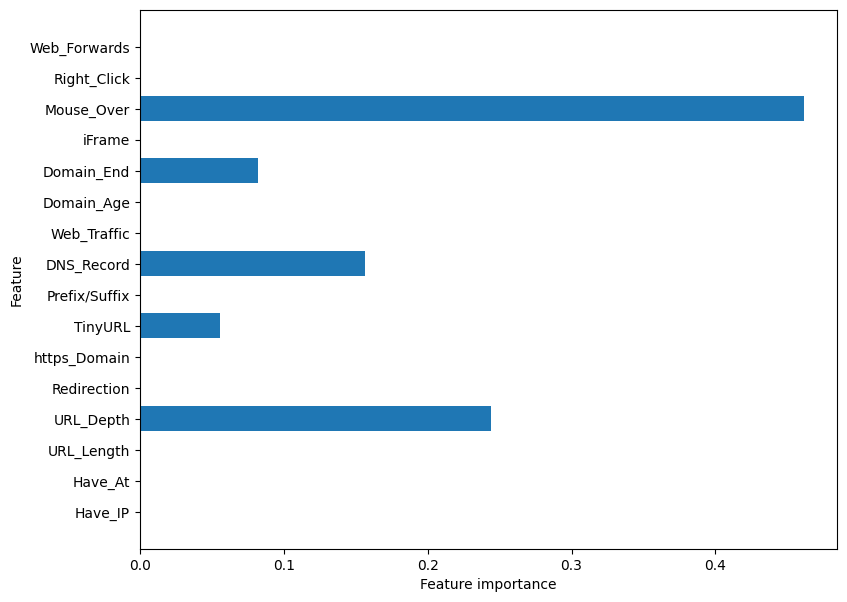

In [105]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [106]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# **ii. Random Forest Classifier**

In [107]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [108]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [109]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.900
Random forest: Accuracy on test Data: 0.800


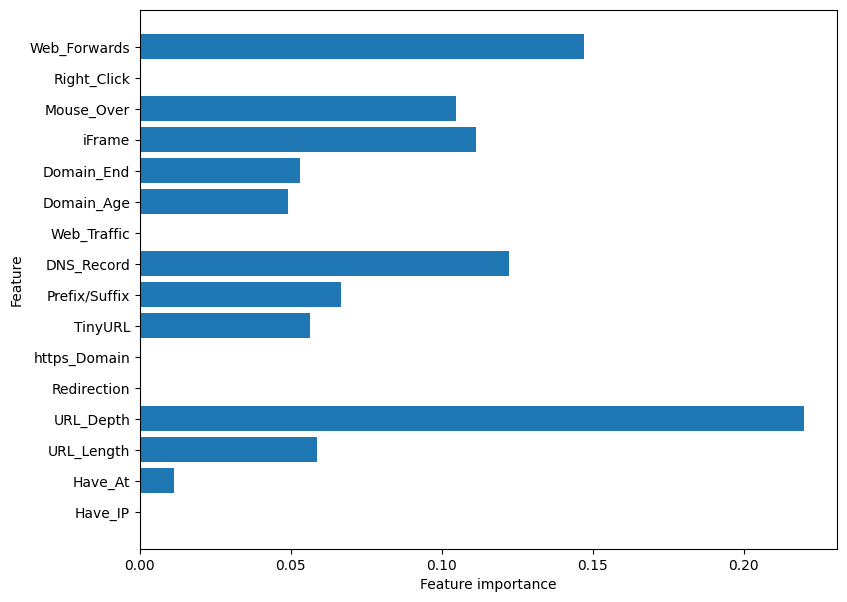

In [110]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [111]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# **iii. Multilayer Perceptrons (MLPs) - Học sâu**

In [112]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [113]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [114]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.912
Multilayer Perceptrons: Accuracy on test Data: 0.750


In [115]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# **iv. XGBoost Classifier**

In [116]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [118]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.887
XGBoost : Accuracy on test Data: 0.700


In [119]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# **v. Autoencoder Neural Network**

In [120]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 16  # 32 floats -> Lấy số chiều input của mình là 16, sau khi bỏ 'Domain' và 'label' và chia cho 24.5
# nhưng số chiều encoding không được là số thập phân nên mình lấy giá trị 16.
# Theo nhiều nguồn tham khảo thì `encoding_dim` nên là 7, 16, 32

# Đây là input image đối với dữ liệu dạng ảnh. Mình có thể sử dụng lại cho mô hình phân loại của chúng
input_img = keras.Input(shape=(16,)) # Chỉnh lại số chiều input theo dữ liệu của mình, sau khi bỏ 'Domain' và 'label' thì còn 16 cột.

# "encoded" là layer dạng encode đại diện cho input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" là layer dạng  lossy reconstruction của input.
decoded = layers.Dense(16, activation='sigmoid')(encoded) # Chỉnh lại theo số chiều dữ liệu của mình ở đây

#  model sẽ maps (ánh xạ) một input vào một reconstruction
autoencoder = keras.Model(input_img, decoded)

In [121]:
# Còn model này sẽ map input thành bản bị encoded của nó
encoder = keras.Model(input_img, encoded)

In [122]:
# Đây là input (đã bị encoded) với số chiều 16
encoded_input = keras.Input(shape=(encoding_dim,))
# Lấy output layer từ model Autoencoder
decoder_layer = autoencoder.layers[-1]
# Tạo model Decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [123]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                #validation_split=0.2,
                validation_data=(X_test, X_test)
                )

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7031 - accuracy: 0.0000e+00 - val_loss: 0.7080 - val_accuracy: 0.0500
Epoch 2/50
1/1 [==============================] - 0s 81ms/step - loss: 0.6981 - accuracy: 0.0000e+00 - val_loss: 0.7040 - val_accuracy: 0.0500
Epoch 3/50
1/1 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.0000e+00 - val_loss: 0.7000 - val_accuracy: 0.0500
Epoch 4/50
1/1 [==============================] - 0s 55ms/step - loss: 0.6881 - accuracy: 0.0000e+00 - val_loss: 0.6960 - val_accuracy: 0.0500
Epoch 5/50
1/1 [==============================] - 0s 87ms/step - loss: 0.6831 - accuracy: 0.0000e+00 - val_loss: 0.6921 - val_accuracy: 0.0500
Epoch 6/50
1/1 [==============================] - 0s 98ms/step - loss: 0.6781 - accuracy: 0.0625 - val_loss: 0.6882 - val_accuracy: 0.0500
Epoch 7/50
1/1 [==============================] - 0s 72ms/step - loss: 0.6732 - accuracy: 0.0625 - val_loss: 0.6843 - val_accuracy: 0.1000
Epoch 8/5

In [125]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

1/1 [==============================] - 0s 45ms/step - loss: 0.5309 - accuracy: 0.5000

Autoencoder: Accuracy on training Data: 0.575
Autoencoder: Accuracy on test Data: 0.500


In [126]:
storeResults('Autoencoder Neural Network', acc_train_auto, acc_test_auto)

# **vi. Support Vector Machines**

In [127]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [128]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Accuracy: ", round((tp + tn) / (tp + tn + fp + fn), 8))
print('False positive rate(FPR): ', round(fp / (fp + tn), 8))
print('False negative rate(FN): ', round(fn / (fn + tp), 8))
recall = round(tp / (tp + fn), 8)
print('Recall(TPR): ', recall)
precision = round(tp / (tp + fp), 8)
print('Precision: ', precision)
print('F1 score: ', round((2 * precision * recall) / (precision + recall), 8))

Accuracy:  0.7
False positive rate(FPR):  0.09090909
False negative rate(FN):  0.55555556
Recall(TPR):  0.44444444
Precision:  0.8
F1 score:  0.57142857


In [129]:
#predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [130]:
#computing the accuracy
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_svm))

XGBoost: Accuracy on training Data: 0.825
XGBoost : Accuracy on test Data: 0.700


In [131]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

# **g. So sánh các mô hình**

In [132]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.862,0.70
1,Random Forest,0.900,0.80
2,Multilayer Perceptrons,0.912,0.75
3,XGBoost,0.888,0.70
4,Autoencoder Neural Network,0.575,0.50
5,Support Vector Machines,0.825,0.70


In [133]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.900,0.80
2,Multilayer Perceptrons,0.912,0.75
3,XGBoost,0.888,0.70
0,Decision Tree,0.862,0.70
5,Support Vector Machines,0.825,0.70
4,Autoencoder Neural Network,0.575,0.50


In [134]:
#Code lưu trữ mô hình
import joblib
joblib.dump(tree, "/content/drive/MyDrive/Lab4/Stored Model/DecisionTree_4.2.pkl")
joblib.dump(forest, "/content/drive/MyDrive/Lab4/Stored Model/RandomForest_4.2.pkl")
joblib.dump(mlp, "/content/drive/MyDrive/Lab4/Stored Model/MultilayerPerceptrons_4.2.pkl")
joblib.dump(xgb, "/content/drive/MyDrive/Lab4/Stored Model/XGBoost_4.2.pkl")
joblib.dump(autoencoder, "/content/drive/MyDrive/Lab4/Stored Model/AutoncoderNN_4.2.pkl")
joblib.dump(svm, "/content/drive/MyDrive/Lab4/Stored Model/SupportVectorMachine_4.2.pkl")

['/content/drive/MyDrive/Lab4/Stored Model/SupportVectorMachine_4.2.pkl']

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites